In [27]:
import scanpy as sc
import sys
sys.path.append("/disk5/luosg/scRNAseq/workflow/scRNAseq/scripts/python/utils")
from rpy2.robjects.conversion import localconverter
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
import numpy as np

In [28]:
r_script_path: str = "/disk5/luosg/scRNAseq/workflow/scRNAseq/scripts/python/utils/DEG_pseduo_bulk.r"

In [29]:
adata = sc.read_h5ad("/disk5/luosg/scRNAseq/output/combine/Intestine/Intestine_bulk.h5ad")
adata

AnnData object with n_obs × n_vars = 70 × 79111
    obs: 'celltype', 'sample', 'lib_size', 'log_lib_size'
    uns: 'celltype_colors', 'log1p', 'pca', 'sample_colors'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'counts'

In [33]:
adata.obs["lib_size"] = np.sum(adata.layers["counts"], axis=1)
adata.obs["log_lib_size"] = np.log(adata.obs["lib_size"])

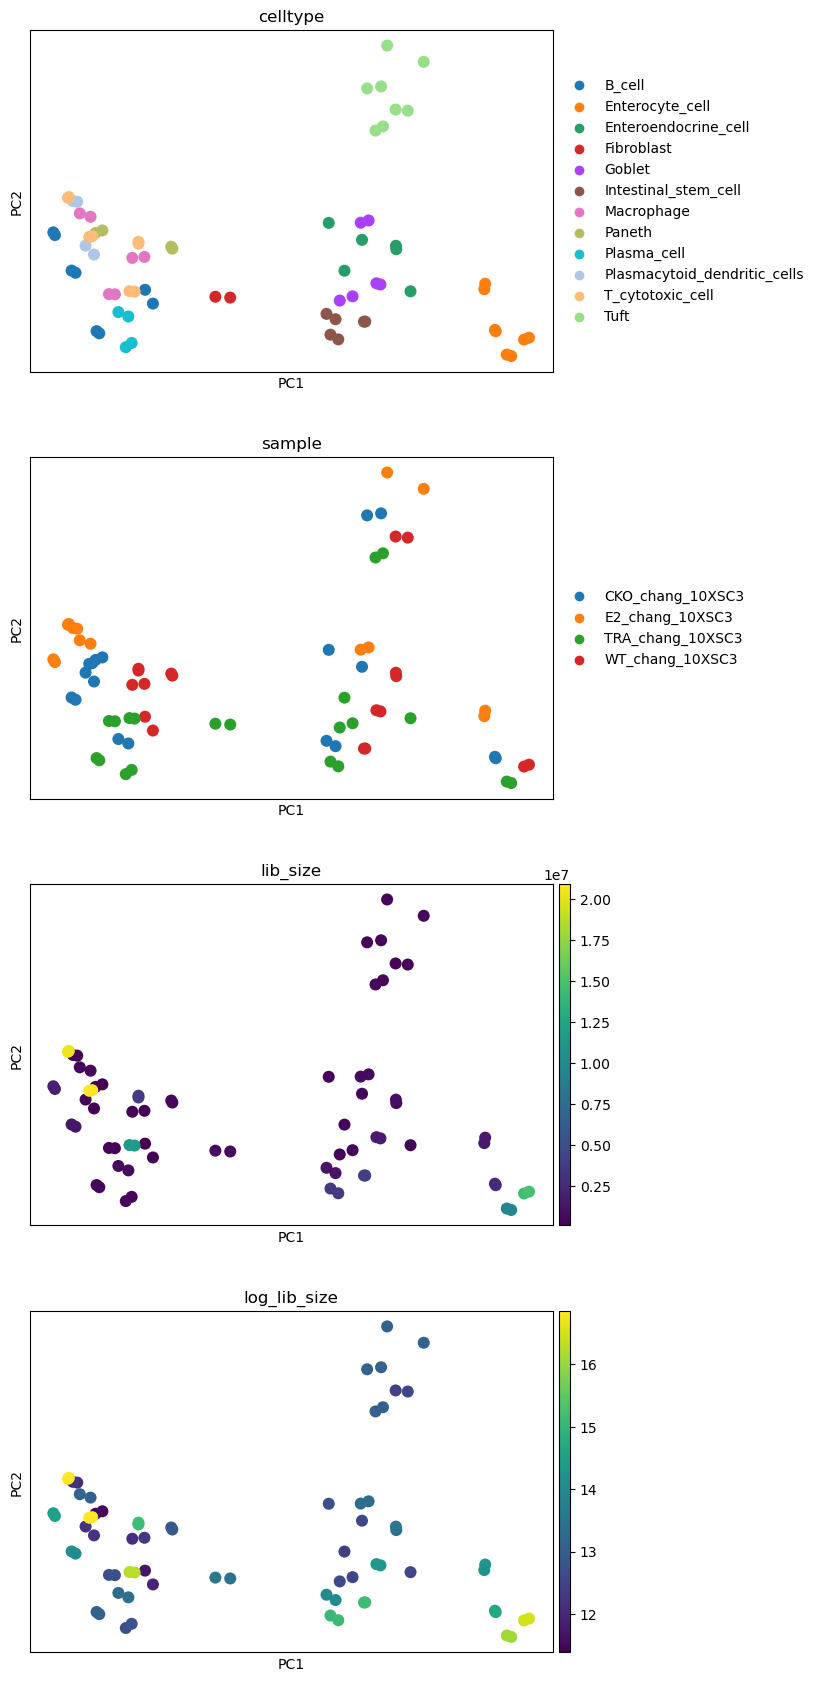

In [34]:
sc.pp.normalize_total(adata, target_sum=1e6)
sc.pp.log1p(adata)
sc.pl.pca(adata, color=adata.obs, ncols=1, size=300)

In [35]:
adata_mono = adata[adata.obs["celltype"] == "B_cell"]
adata_mono

View of AnnData object with n_obs × n_vars = 8 × 79111
    obs: 'celltype', 'sample', 'lib_size', 'log_lib_size'
    uns: 'celltype_colors', 'log1p', 'pca', 'sample_colors'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'counts'